In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
base_dir = "/global/home/users/rrmastandrea/JetCLR/"  # change this to your working directory
exp_id = "lmwt_wlct_wnn_2"
expt_dir = base_dir + "projects/rep_learning/experiments/" + exp_id + "/"
constit_num = 20

# TPR / FPR

/global/home/users/rrmastandrea/computingEnv/lib64/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/global/home/users/rrmastandrea/computingEnv/lib64/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/global/home/users/rrmastandrea/computingEnv/lib64/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide
/global/home/users/rrmastandrea/computingEnv/lib64/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/global/home/users/rrmastandrea/computingEnv/lib64/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide


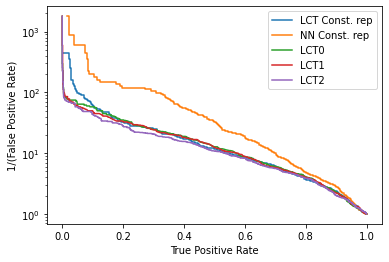

In [3]:
# Load in the data

lct_const_rep_tpr = np.load( expt_dir+"const_rep_lct_tpr_"+str(constit_num)+".npy" )
lct_const_rep_fpr = np.load( expt_dir+"const_rep_lct_fpr_"+str(constit_num)+".npy" )
nn_const_rep_tpr = np.load( expt_dir+"const_rep_nn_tpr_"+str(constit_num)+".npy" )
nn_const_rep_fpr = np.load( expt_dir+"const_rep_nn_fpr_"+str(constit_num)+".npy" )
lct0_tpr =  np.load( expt_dir+"CLR_LCT0_tpr_"+str(constit_num)+".npy" )
lct0_fpr =  np.load( expt_dir+"CLR_LCT0_fpr_"+str(constit_num)+".npy" )
lct1_tpr =  np.load( expt_dir+"CLR_LCT1_tpr_"+str(constit_num)+".npy" )
lct1_fpr =  np.load( expt_dir+"CLR_LCT1_fpr_"+str(constit_num)+".npy" )
lct2_tpr =  np.load( expt_dir+"CLR_LCT2_tpr_"+str(constit_num)+".npy" )
lct2_fpr =  np.load( expt_dir+"CLR_LCT2_fpr_"+str(constit_num)+".npy" )


plt.figure()
plt.plot(lct_const_rep_tpr, 1.0/lct_const_rep_fpr, label = "LCT Const. rep")
plt.plot(nn_const_rep_tpr, 1.0/nn_const_rep_fpr, label = "NN Const. rep")
plt.plot(lct0_tpr, 1.0/lct0_fpr, label = "LCT0")
plt.plot(lct1_tpr, 1.0/lct1_fpr, label = "LCT1")
plt.plot(lct2_tpr, 1.0/lct2_fpr, label = "LCT2")
plt.yscale("log")
plt.xlabel("True Positive Rate")
plt.ylabel("1/(False Positive Rate)")
plt.legend()
plt.show()



# Losses

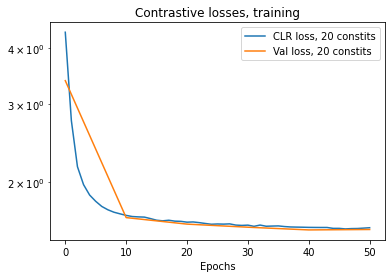

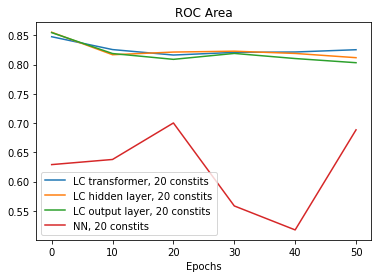

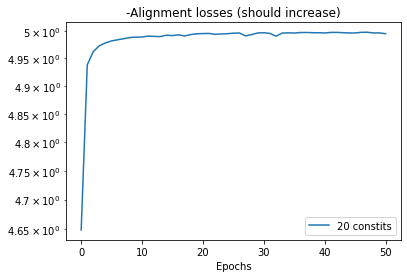

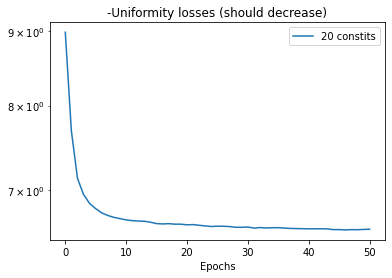

In [4]:
# load in data
losses_clr_train_num_jets = {}
losses_clr_numer_train_num_jets = {}
losses_clr_denom_train_num_jets = {}
losses_clr_val_train_num_jets = {}
lct_auc_num_jets = {}
nn_auc_num_jets = {}


grading = 20
start = 20
n_constits_max = 20

for constit_num in range(start,n_constits_max+grading,grading):

    losses_clr_train_num_jets[constit_num] = np.load( expt_dir+"clr_losses_train_"+str(constit_num)+".npy")
    losses_clr_numer_train_num_jets[constit_num] = np.load( expt_dir+"clr_numer_loss_train_"+str(constit_num)+".npy")
    losses_clr_denom_train_num_jets[constit_num] = np.load( expt_dir+"clr_denom_loss_train_"+str(constit_num)+".npy")
    losses_clr_val_train_num_jets[constit_num] = np.load( expt_dir+"clr_losses_val_"+str(constit_num)+".npy")
    lct_auc_num_jets[constit_num] = np.load( expt_dir+"lct_auc_"+str(constit_num)+".npy")
    nn_auc_num_jets[constit_num] = np.load( expt_dir+"nn_auc_"+str(constit_num)+".npy")

    
def plot_losses(list_of_plots, title, ylog = False):
    """
    list_of_plots = [(plot_x, plot_y, label)]
    """
    plt.figure()
    for to_plot in list_of_plots:
       
        plt.plot(to_plot[0], to_plot[1], label=to_plot[2])
    plt.legend()
    if ylog:
        plt.yscale("log")
    plt.xlabel("Epochs")
    plt.title(title)
    plt.show()
    
    
"""
Plot the training contrastive losses
"""
plot_clr_losses = []
for constit_num in range(start,n_constits_max+grading,grading):
    plot_clr_losses.append((range(len(losses_clr_train_num_jets[constit_num])),
                           losses_clr_train_num_jets[constit_num], "CLR loss, "+str(constit_num) + " constits"))
    plot_clr_losses.append((losses_clr_val_train_num_jets[constit_num][0],
                           losses_clr_val_train_num_jets[constit_num][1],"Val loss, "+str(constit_num) + " constits"))
plot_losses(plot_clr_losses, "Contrastive losses, training", True)  
    
"""
Plot the validation contrastive losses
"""
#plot_clr_val_losses = []
#for constit_num in range(start,n_constits_max+grading,grading):
#    plot_clr_val_losses.append((losses_clr_val_train_num_jets[constit_num][0],
#                           losses_clr_val_train_num_jets[constit_num][1],str(constit_num) + " constits"))
#plot_losses(plot_clr_val_losses, "Contrastive losses, validation", True)  


"""
Plot the LC + NN AUC
"""

plot_LCT_stats = []

for constit_num in range(start,n_constits_max+grading,grading):
    plot_LCT_stats.append((lct_auc_num_jets[constit_num][0], lct_auc_num_jets[constit_num][1],
                             "LC transformer, "+str(constit_num) + " constits"))
    plot_LCT_stats.append((lct_auc_num_jets[constit_num][0], lct_auc_num_jets[constit_num][2],
                            "LC hidden layer, "+str(constit_num) + " constits"))
    plot_LCT_stats.append((lct_auc_num_jets[constit_num][0], lct_auc_num_jets[constit_num][3],
                            "LC output layer, "+str(constit_num) + " constits"))
    plot_LCT_stats.append((nn_auc_num_jets[constit_num][0], nn_auc_num_jets[constit_num][1],
                             "NN, "+ str(constit_num) + " constits"))
    
plot_losses(plot_LCT_stats, "ROC Area", False)  


    
    
"""
Plot the training contrastive losses num + denom
"""

plot_num_val_losses = []
for constit_num in range(start,n_constits_max+grading,grading):
    plot_num_val_losses.append((range(len(losses_clr_numer_train_num_jets[constit_num])),
                           -losses_clr_numer_train_num_jets[constit_num], str(constit_num) + " constits"))
plot_losses(plot_num_val_losses, "-Alignment losses (should increase)", True)  

plot_den_val_losses = []
for constit_num in range(start,n_constits_max+grading,grading):
    plot_den_val_losses.append((range(len(losses_clr_denom_train_num_jets[constit_num])),
                           -losses_clr_denom_train_num_jets[constit_num],  str(constit_num) + " constits"))
plot_losses(plot_den_val_losses, "-Uniformity losses (should decrease)", True)  


    